In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('full_data.csv')

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


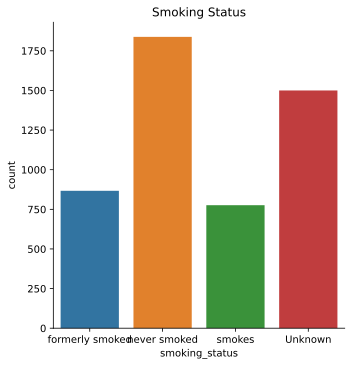

In [66]:
pd.DataFrame(pd.cut(df['age'], bins=[0, 18, 30, 50, 65, 100])).reset_index().groupby("age").count()

,index
age,
"(0, 18]",880
"(18, 30]",640
"(30, 50]",1368
"(50, 65]",1134
"(65, 100]",959


<AxesSubplot:>

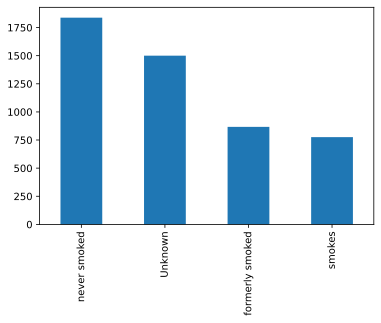

In [44]:
df['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

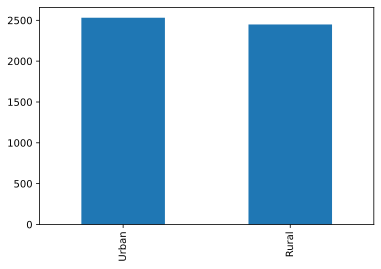

In [45]:
df['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

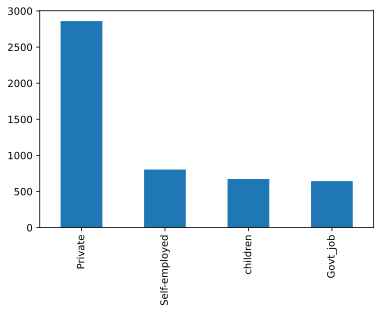

In [46]:
df['work_type'].value_counts().plot(kind='bar')

In [47]:
df.describe().drop(["stroke", "hypertension", "heart_disease"], axis=1).drop("count")

,age,avg_glucose_level,bmi
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


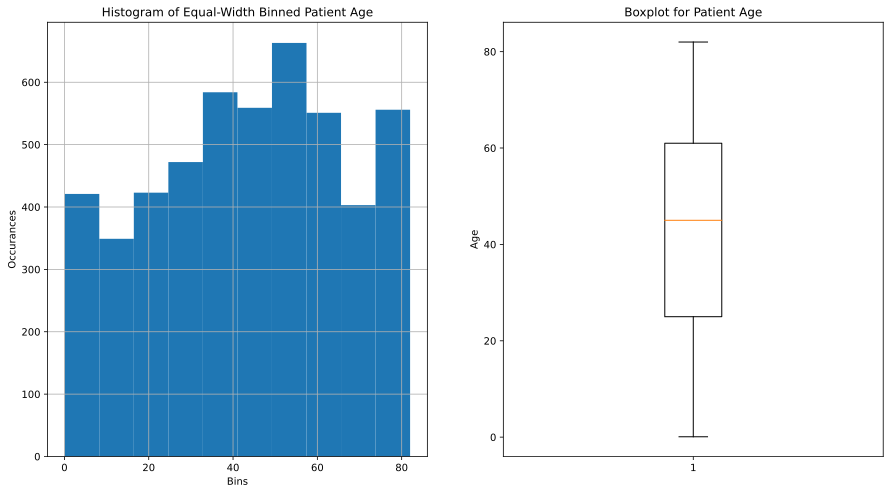

In [48]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(15, 8)

ax1.set_title("Histogram of Equal-Width Binned Patient Age")
ax2.set_title("Boxplot for Patient Age")
ax1.set_ylabel("Occurances")
ax2.set_ylabel("Age")
ax1.set_xlabel("Bins")

df['age'].hist(bins=10, ax=ax1)
ax2.boxplot(df['age'])

plt.savefig("EDA Graphs/Age Distribution.png")
plt.show()

In [49]:
pd.DataFrame(pd.cut(df['age'], bins=10)).reset_index().groupby("age").count()

,index
age,
"(-0.00192, 8.272]",421
"(8.272, 16.464]",349
"(16.464, 24.656]",423
"(24.656, 32.848]",472
"(32.848, 41.04]",584
"(41.04, 49.232]",559
"(49.232, 57.424]",663
"(57.424, 65.616]",551
"(65.616, 73.808]",403


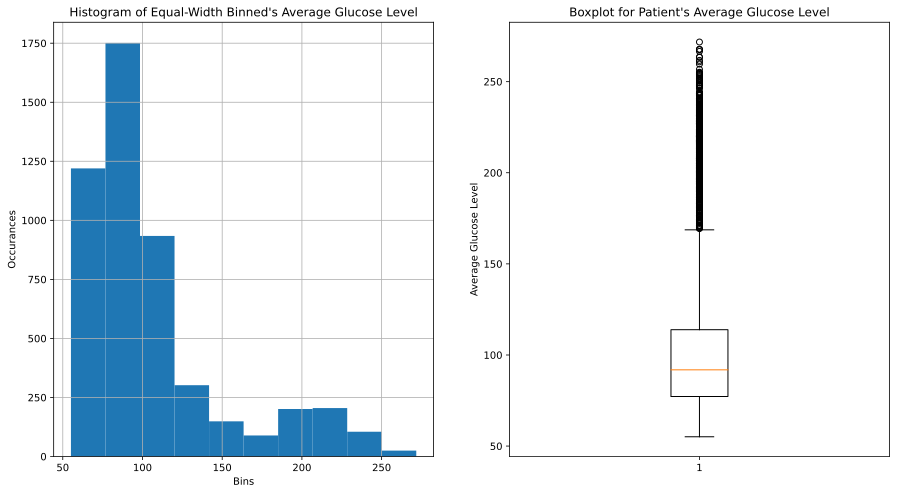

In [50]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(15, 8)

ax1.set_title("Histogram of Equal-Width Binned's Average Glucose Level")
ax2.set_title("Boxplot for Patient's Average Glucose Level")
ax1.set_ylabel("Occurances")
ax2.set_ylabel("Average Glucose Level")
ax1.set_xlabel("Bins")

df['avg_glucose_level'].hist(bins=10, ax=ax1)
ax2.boxplot(df['avg_glucose_level'])

plt.savefig("EDA Graphs/Glucose Distribution.png")
plt.show()

In [51]:
pd.DataFrame(pd.cut(df['avg_glucose_level'], bins=10)).reset_index().groupby("avg_glucose_level").count()

,index
avg_glucose_level,
"(54.903, 76.782]",1220
"(76.782, 98.444]",1751
"(98.444, 120.106]",934
"(120.106, 141.768]",302
"(141.768, 163.43]",149
"(163.43, 185.092]",89
"(185.092, 206.754]",201
"(206.754, 228.416]",205
"(228.416, 250.078]",105


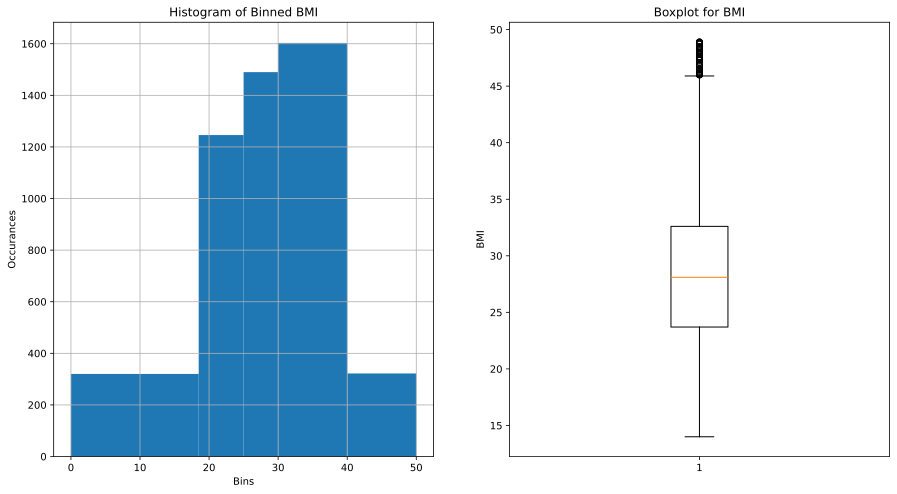

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(15, 8)

ax1.set_title("Histogram of Binned BMI")
ax2.set_title("Boxplot for BMI")
ax1.set_ylabel("Occurances")
ax2.set_ylabel("BMI")
ax1.set_xlabel("Bins")

df['bmi'].hist(bins=[0, 18.5, 25, 30, 40, 50], ax=ax1)
ax2.boxplot(df['bmi'])

plt.savefig("EDA Graphs/BMI Distribution.png")
plt.show()

In [5]:
pd.DataFrame(pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 40, 50])).reset_index().groupby("bmi").count()

,index
bmi,
"(0.0, 18.5]",332
"(18.5, 25.0]",1261
"(25.0, 30.0]",1500
"(30.0, 40.0]",1572
"(40.0, 50.0]",316


In [54]:
df.describe().iloc[1:][["age", "hypertension", "heart_disease","avg_glucose_level", "bmi"]]

,age,hypertension,heart_disease,avg_glucose_level,bmi
mean,43.419859,0.096165,0.055210,105.943562,28.498173
std,22.662755,0.294848,0.228412,45.075373,6.790464
min,0.080000,0.000000,0.000000,55.120000,14.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000
50%,45.000000,0.000000,0.000000,91.850000,28.100000
75%,61.000000,0.000000,0.000000,113.860000,32.600000
max,82.000000,1.000000,1.000000,271.740000,48.900000


In [55]:
df = df[df['smoking_status'] != 'Unknown']

In [56]:
df.describe().iloc[1:][["age", "hypertension", "heart_disease","avg_glucose_level", "bmi"]]

,age,hypertension,heart_disease,avg_glucose_level,bmi
mean,49.067509,0.12324,0.065211,108.769155,29.808159
std,18.894255,0.32876,0.246934,48.133475,6.228310
min,10.000000,0.00000,0.000000,55.120000,14.100000
25%,34.000000,0.00000,0.000000,77.450000,25.300000
50%,50.000000,0.00000,0.000000,92.490000,29.100000
75%,64.000000,0.00000,0.000000,116.250000,33.500000
max,82.000000,1.00000,1.000000,271.740000,48.900000


In [57]:
df['agegroup'] = pd.cut(df['age'], bins=10)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agegroup
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(60.4, 67.6]"
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(74.8, 82.0]"
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(46.0, 53.2]"
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(74.8, 82.0]"
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(74.8, 82.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,"(38.8, 46.0]"
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,"(38.8, 46.0]"
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,"(38.8, 46.0]"
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,"(38.8, 46.0]"


In [58]:
df['bmi'].boxplot(by='agegroup')

AttributeError: 'Series' object has no attribute 'boxplot'

In [59]:
df['ever_married'] = [1 if x == 'Yes' else 0 for x in df['ever_married']]

<AxesSubplot:>

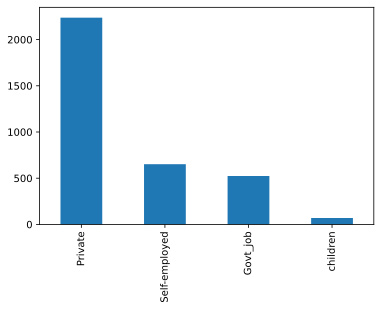

In [60]:
df['work_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

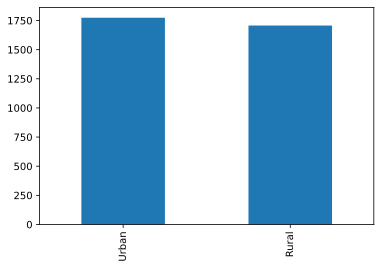

In [61]:
df['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

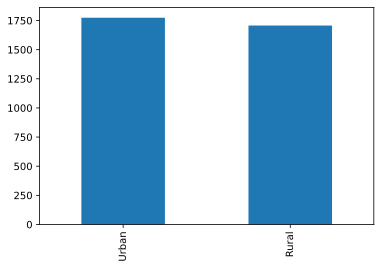

In [62]:
df['Residence_type'].value_counts().plot(kind='bar')

In [63]:
pd.DataFrame(pd.cut(df['age'], bins=[0, 18, 30, 50, 65, 100])).reset_index().groupby("age").count()

,index
age,
"(0, 18]",194
"(18, 30]",492
"(30, 50]",1090
"(50, 65]",923
"(65, 100]",782


In [71]:
#df['age'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 65, 100])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,"(65, 100]",0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,"(65, 100]",0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,"(30, 50]",0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,"(65, 100]",1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,"(65, 100]",0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,"(30, 50]",0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,"(30, 50]",0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,"(30, 50]",1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,"(30, 50]",0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [88]:
def encode(df, name):
    df[[x + '_' + name for x in df[name].unique()]] = [[1 if x == y else 0 for x in df[name].unique()] for y in df[name]]

for x in ["ever_married", "Residence_type", "work_type", "smoking_status", "gender"]:
    encode(df, x)

In [89]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Govt_job_work_type,children_work_type,Urban_Residence_type,Rural_Residence_type,formerly smoked_smoking_status,never smoked_smoking_status,smokes_smoking_status,Unknown_smoking_status,Male_gender,Female_gender
0,Male,"(65, 100]",0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0,0,1,0,1,0,0,0,1,0
1,Male,"(65, 100]",0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,0,0,0,1,0,1,0,0,1,0
2,Female,"(30, 50]",0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,0,1,0,0,0,1,0,0,1
3,Female,"(65, 100]",1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,0,0,1,0,1,0,0,0,1
4,Male,"(65, 100]",0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,"(30, 50]",0,0,No,Private,Rural,70.15,29.8,formerly smoked,...,0,0,0,1,1,0,0,0,1,0
4977,Male,"(30, 50]",0,0,Yes,Private,Urban,191.15,31.1,smokes,...,0,0,1,0,0,0,1,0,1,0
4978,Female,"(30, 50]",1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,...,1,0,0,1,0,0,1,0,0,1
4979,Male,"(30, 50]",0,0,Yes,Private,Rural,83.94,30.0,smokes,...,0,0,0,1,0,0,1,0,1,0
